# M3 Model Evaluation

Divided into two parts:

1. Overall model evaluation performed on all data from the test set.

2. Evaluation with respect to each family. 

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
import csv
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense
import numpy as np
import pandas as pd

2023-01-17 16:46:06.260421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 16:46:07.901677: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-17 16:46:07.901747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-17 16:46:07.901754: W tensorfl

In [2]:
HF_DATASET = 'EvaKlimentova/knots_AF'
MODEL = '/home/jovyan/models/2023_data_v1/cnn_10epochs_94.h5'
OUTPUT = '/home/jovyan/data/new_preds_all_data.csv'
PATCH_SIZES = [10, 20, 30, 50, 80, 150, 200]

## Load the trained model and raw test data:

In [3]:
model = tf.keras.models.load_model(MODEL)

2023-01-17 16:46:11.182918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 16:46:11.564190: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 705 MB memory:  -> device: 0, name: NVIDIA A10, pci bus id: 0000:21:00.0, compute capability: 8.6


In [4]:
from datasets import load_dataset

dataset = load_dataset(HF_DATASET)
dataset

Using custom data configuration EvaKlimentova--knots_AF-cd42605bc53e4fb3
Found cached dataset parquet (/home/jovyan/.cache/huggingface/datasets/EvaKlimentova___parquet/EvaKlimentova--knots_AF-cd42605bc53e4fb3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['ID', 'latestVersion', 'globalMetricValue', 'uniprotStart', 'uniprotEnd', 'uniprotSequence', 'Length', 'Domain_architecture', 'InterPro', 'Max_Topology', 'Max Freq', 'Knot Core', 'label', 'FamilyName'],
        num_rows: 159028
    })
    test: Dataset({
        features: ['ID', 'latestVersion', 'globalMetricValue', 'uniprotStart', 'uniprotEnd', 'uniprotSequence', 'Length', 'Domain_architecture', 'InterPro', 'Max_Topology', 'Max Freq', 'Knot Core', 'label', 'FamilyName'],
        num_rows: 39758
    })
})

In [5]:
dataset_test = dataset['test'].to_pandas()
dataset_test

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Domain_architecture,InterPro,Max_Topology,Max Freq,Knot Core,label,FamilyName
0,A0A3S4KGE1,4,71.88,1,123,MQKKIQQWQKIAIAACEQSGRNVVPEIRPAMQLEAWCAEQDSGLKL...,123.0,PF04452;,IPR029028;IPR006700;IPR046886;IPR029026;,3_1,0.880,"(47, 92)",1,SPOUT
1,Q2GXK7,4,80.69,1,339,MSGGWNTIESDALQGVFTYLLDNLGVKDVQFEELLSLDPDALAQLY...,339.0,PF01088;PF18031;,IPR038765;IPR001578;IPR036959;IPR017390;IPR041...,5_2,0.736,"(6, 242)",1,UCH
2,A0A2N2PCU9,4,88.81,1,434,MEWASRVGLPTIQLTFCSNLEVAMVEKFSFEMHFDADMIAREVPSQ...,434.0,PF00092;,IPR002035;IPR036465;,None,NaN,None,0,VIT
3,A0A2E8VC54,4,81.50,1,179,MIEDIFFKDPIFLWLFLFFPIIILWYFFTKNKSQPLLKISSTKGFE...,179.0,PF07584;PF13519;,IPR024163;IPR002035;IPR036465;,None,NaN,None,0,VIT
4,A0A3A3DDF1,4,96.56,1,156,MKIQLVAVGTKMPAWVETGFKEYQRRFPKDMALELLEIPAGKRGKN...,156.0,PF02590;,IPR029028;IPR003742;IPR029026;,3_1,0.732,"(72, 121)",1,SPOUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39753,A0A316H2N2,4,70.62,1,633,MLDFLELEETVGRAWHRLIGHVQTWPRHPEHAVRLAEVQPVLAVCF...,633.0,PF00092;,IPR002035;IPR036465;,None,NaN,None,0,VIT
39754,A0A2D6PHG0,4,90.06,1,308,MLENILIFVVAVAVLVKSANVTINSLTNLAKNINVSEFLIATVLMG...,308.0,PF01699;,IPR004481;IPR004837;IPR044880;,3_1,0.714,"(50, 244)",1,membrane
39755,A0A7X6TLA9,4,73.31,1,372,MNQNNRHSDNNRNNQSNKRRSSSQSGRSGQQKRQSKFEGGPQDGVL...,372.0,PF00588;PF08032;,IPR029028;IPR029064;IPR004441;IPR001537;IPR013...,3_1,0.958,"(272, 313)",1,SPOUT
39756,J5QJ94,4,82.44,1,344,MEDGWCLTESDPQVFSELLRQLGVKGLQVDDLYSLDAETLAPLQPI...,344.0,PF01088;PF18031;,IPR038765;IPR001578;IPR036959;IPR017390;IPR041...,5_2,0.672,"(6, 251)",1,UCH


In [6]:
dataset_test['label'] = dataset_test['label'].astype(float)
dataset_test['FamilyName'] = dataset_test['FamilyName'].astype('str')
dataset_test = dataset_test[dataset_test['uniprotSequence'].str.len() <= 500]
dataset_test['uniprotSequence'] = dataset_test['uniprotSequence'].apply(lambda x: x + (500 - len(x))*'X')
dataset_test

/tmp/ipykernel_1483476/2696036173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test['uniprotSequence'] = dataset_test['uniprotSequence'].apply(lambda x: x + (500 - len(x))*'X')


,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Domain_architecture,InterPro,Max_Topology,Max Freq,Knot Core,label,FamilyName
0,A0A3S4KGE1,4,71.88,1,123,MQKKIQQWQKIAIAACEQSGRNVVPEIRPAMQLEAWCAEQDSGLKL...,123.0,PF04452;,IPR029028;IPR006700;IPR046886;IPR029026;,3_1,0.880,"(47, 92)",1.0,SPOUT
1,Q2GXK7,4,80.69,1,339,MSGGWNTIESDALQGVFTYLLDNLGVKDVQFEELLSLDPDALAQLY...,339.0,PF01088;PF18031;,IPR038765;IPR001578;IPR036959;IPR017390;IPR041...,5_2,0.736,"(6, 242)",1.0,UCH
2,A0A2N2PCU9,4,88.81,1,434,MEWASRVGLPTIQLTFCSNLEVAMVEKFSFEMHFDADMIAREVPSQ...,434.0,PF00092;,IPR002035;IPR036465;,None,NaN,None,0.0,VIT
3,A0A2E8VC54,4,81.50,1,179,MIEDIFFKDPIFLWLFLFFPIIILWYFFTKNKSQPLLKISSTKGFE...,179.0,PF07584;PF13519;,IPR024163;IPR002035;IPR036465;,None,NaN,None,0.0,VIT
4,A0A3A3DDF1,4,96.56,1,156,MKIQLVAVGTKMPAWVETGFKEYQRRFPKDMALELLEIPAGKRGKN...,156.0,PF02590;,IPR029028;IPR003742;IPR029026;,3_1,0.732,"(72, 121)",1.0,SPOUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39751,A0A4U0YY35,4,94.19,1,372,MKSGLFTSESVSDGHPDKICDQISDAILDACLAQDPVSRVAMETAV...,372.0,PF02773;PF02772;PF00438;,IPR022631;IPR022630;IPR022629;IPR022628;IPR002...,3_1,0.648,"(12, 259)",1.0,AdoMet synthase
39754,A0A2D6PHG0,4,90.06,1,308,MLENILIFVVAVAVLVKSANVTINSLTNLAKNINVSEFLIATVLMG...,308.0,PF01699;,IPR004481;IPR004837;IPR044880;,3_1,0.714,"(50, 244)",1.0,membrane
39755,A0A7X6TLA9,4,73.31,1,372,MNQNNRHSDNNRNNQSNKRRSSSQSGRSGQQKRQSKFEGGPQDGVL...,372.0,PF00588;PF08032;,IPR029028;IPR029064;IPR004441;IPR001537;IPR013...,3_1,0.958,"(272, 313)",1.0,SPOUT
39756,J5QJ94,4,82.44,1,344,MEDGWCLTESDPQVFSELLRQLGVKGLQVDDLYSLDAETLAPLQPI...,344.0,PF01088;PF18031;,IPR038765;IPR001578;IPR036959;IPR017390;IPR041...,5_2,0.672,"(6, 251)",1.0,UCH


Transform the data to a format suitable as an input to the CNN:

In [7]:
dataset_test_sequences = dataset_test['uniprotSequence'].to_list()
len(dataset_test_sequences)

30040

In [8]:
nucleo_dic = {
    'A': 0,
    'R': 1,
    'N': 2,
    'D': 3,
    'C': 4,
    'Q': 5,
    'E': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'L': 10,
    'K': 11,
    'M': 12,
    'F': 13,
    'P': 14,
    'S': 15,
    'T': 16,
    'W': 17,
    'Y': 18,
    'V': 19,
    'X': 20
}

# the functions below enable us to pass a sequence with variable length as input:

def create_generator(list_of_arrays):
    for i in list_of_arrays:
        yield i
        
def encode_sequence(seq):
    seq_onehot = tf.one_hot([nucleo_dic[c] for c in seq], depth=21)
    return np.expand_dims(seq_onehot, axis=0)

def predict_batch(data, start, end):
    encoded_sequences = [encode_sequence(_) for _ in dataset_test_sequences[start:end]]
    dataset = tf.data.Dataset.from_generator(lambda: create_generator(encoded_sequences), output_types= tf.float32)
    predictions = model.predict(dataset, verbose=0)
    predictions = [_[0] for _ in predictions.tolist()]
    del(encoded_sequences)
    return predictions

## Get predictions:

In [9]:
all_preds = []
batch_size = 10000

for i in range(0, len(dataset_test_sequences), batch_size):
    if i + batch_size > len(dataset_test_sequences):
        end = len(dataset_test_sequences)
    else:
        end = i + batch_size
        
    try:
        all_preds += predict_batch(dataset_test_sequences, i, end)
        print(f'Calculated for data in range {i} - {end}.')
    except Exception:
        print(i)
        print(dataset_test_sequences[i])
        print('ERROR')
    
len(all_preds)

2023-01-17 16:46:19.618890: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204


Calculated for data in range 0 - 10000.
Calculated for data in range 10000 - 20000.
Calculated for data in range 20000 - 30000.
Calculated for data in range 30000 - 30040.


30040

In [10]:
dataset_test['pred'] = all_preds
dataset_test

/tmp/ipykernel_1483476/2851846715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test['pred'] = all_preds


,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Domain_architecture,InterPro,Max_Topology,Max Freq,Knot Core,label,FamilyName,pred
0,A0A3S4KGE1,4,71.88,1,123,MQKKIQQWQKIAIAACEQSGRNVVPEIRPAMQLEAWCAEQDSGLKL...,123.0,PF04452;,IPR029028;IPR006700;IPR046886;IPR029026;,3_1,0.880,"(47, 92)",1.0,SPOUT,0.914590
1,Q2GXK7,4,80.69,1,339,MSGGWNTIESDALQGVFTYLLDNLGVKDVQFEELLSLDPDALAQLY...,339.0,PF01088;PF18031;,IPR038765;IPR001578;IPR036959;IPR017390;IPR041...,5_2,0.736,"(6, 242)",1.0,UCH,0.971288
2,A0A2N2PCU9,4,88.81,1,434,MEWASRVGLPTIQLTFCSNLEVAMVEKFSFEMHFDADMIAREVPSQ...,434.0,PF00092;,IPR002035;IPR036465;,None,NaN,None,0.0,VIT,0.000203
3,A0A2E8VC54,4,81.50,1,179,MIEDIFFKDPIFLWLFLFFPIIILWYFFTKNKSQPLLKISSTKGFE...,179.0,PF07584;PF13519;,IPR024163;IPR002035;IPR036465;,None,NaN,None,0.0,VIT,0.000001
4,A0A3A3DDF1,4,96.56,1,156,MKIQLVAVGTKMPAWVETGFKEYQRRFPKDMALELLEIPAGKRGKN...,156.0,PF02590;,IPR029028;IPR003742;IPR029026;,3_1,0.732,"(72, 121)",1.0,SPOUT,0.999653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39751,A0A4U0YY35,4,94.19,1,372,MKSGLFTSESVSDGHPDKICDQISDAILDACLAQDPVSRVAMETAV...,372.0,PF02773;PF02772;PF00438;,IPR022631;IPR022630;IPR022629;IPR022628;IPR002...,3_1,0.648,"(12, 259)",1.0,AdoMet synthase,0.997490
39754,A0A2D6PHG0,4,90.06,1,308,MLENILIFVVAVAVLVKSANVTINSLTNLAKNINVSEFLIATVLMG...,308.0,PF01699;,IPR004481;IPR004837;IPR044880;,3_1,0.714,"(50, 244)",1.0,membrane,0.950606
39755,A0A7X6TLA9,4,73.31,1,372,MNQNNRHSDNNRNNQSNKRRSSSQSGRSGQQKRQSKFEGGPQDGVL...,372.0,PF00588;PF08032;,IPR029028;IPR029064;IPR004441;IPR001537;IPR013...,3_1,0.958,"(272, 313)",1.0,SPOUT,0.995892
39756,J5QJ94,4,82.44,1,344,MEDGWCLTESDPQVFSELLRQLGVKGLQVDDLYSLDAETLAPLQPI...,344.0,PF01088;PF18031;,IPR038765;IPR001578;IPR036959;IPR017390;IPR041...,5_2,0.672,"(6, 251)",1.0,UCH,0.959248


In [11]:
dataset_test.to_csv(OUTPUT, encoding='utf-8', index=False)
# dataset_test = pd.read_csv(OUTPUT)

## Overall model evaluation:

M3
Size: 30040 (1=15081, 0=14959)

Accuracy: 0.9429760319573901
TPR: 0.9746038061136529
TNR: 0.9110903135236312
FPR: 0.08890968647636874
FNR: 0.02539619388634706



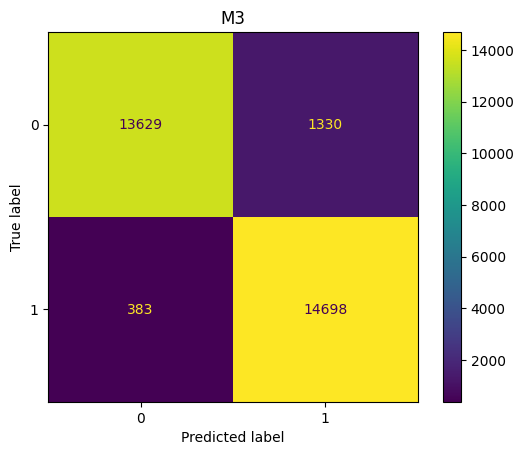

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def get_all_metrics(df, title):
    df_size = len(df)
    df_1 = df.loc[df['label'] == 1.0]
    df_0 = df.loc[df['label'] == 0.0]
    print(title)
    print(f'Size: {df_size} (1={len(df_1)}, 0={len(df_0)})\n')
    print(f'Accuracy: {accuracy_score(df["label"], df["pred"].round())}')
    
    cm = confusion_matrix(df['label'], df['pred'].round())
    
    cm_ravel = cm.ravel()
    if len(cm_ravel) == 4:
        tn, fp, fn, tp = cm_ravel
        tpr = tp / (tp + fn)
        tnr = tn / (tn + fp)
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        print(f'TPR: {tpr}')
        print(f'TNR: {tnr}')
        print(f'FPR: {fpr}')
        print(f'FNR: {fnr}\n')
    else:
        print('Confusion matrix does not contain all TN, FP, FN, TP, skipping *R computation.\n')
        
    
    cmd = ConfusionMatrixDisplay(cm)
    ax = cmd.plot()
    ax.ax_.set_title(title)
    
get_all_metrics(dataset_test, 'M3')

How certain is the model with it's predictions? 

*It would be nice if histogram of the predictions created two peaks - one peak close to 0.0 and the second close to 1.0 (not around 0.5).*

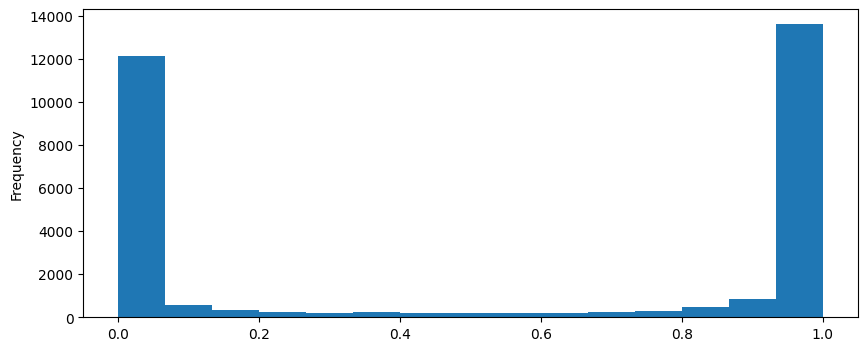

In [13]:
ax = dataset_test['pred'].plot.hist(bins=15, figsize=(10, 4))

## Get results for each family:

In [14]:
families = list(dataset_test['FamilyName'].unique())
families

['SPOUT',
 'UCH',
 'VIT',
 'Carbonic anhydrase',
 'membrane',
 'ATCase/OTCase',
 'AdoMet synthase',
 'DUF',
 'TDD',
 'ribosomal-mitochondrial',
 'biosynthesis of lantibiotics',
 'None',
 'VIT,membrane']

SPOUT
Size: 7699 (1=7032, 0=667)

Accuracy: 0.9480452006754124
TPR: 0.9890500568828214
TNR: 0.5157421289355323
FPR: 0.48425787106446777
FNR: 0.010949943117178612

UCH
Size: 475 (1=306, 0=169)

Accuracy: 0.7557894736842106
TPR: 0.9183006535947712
TNR: 0.46153846153846156
FPR: 0.5384615384615384
FNR: 0.08169934640522876

VIT
Size: 8170 (1=79, 0=8091)

Accuracy: 0.9835985312117503
TPR: 0.5316455696202531
TNR: 0.9880113706587567
FPR: 0.011988629341243357
FNR: 0.46835443037974683

Carbonic anhydrase
Size: 1506 (1=928, 0=578)

Accuracy: 0.7742363877822045
TPR: 0.915948275862069
TNR: 0.5467128027681661
FPR: 0.4532871972318339
FNR: 0.08405172413793104

membrane
Size: 5077 (1=3843, 0=1234)

Accuracy: 0.9170770139846366
TPR: 0.9705958886286755
TNR: 0.7504051863857374
FPR: 0.24959481361426256
FNR: 0.029404111371324485

ATCase/OTCase
Size: 3814 (1=442, 0=3372)

Accuracy: 0.9918720503408495
TPR: 0.9909502262443439
TNR: 0.9919928825622776
FPR: 0.00800711743772242
FNR: 0.00904977375565611

AdoMet syn

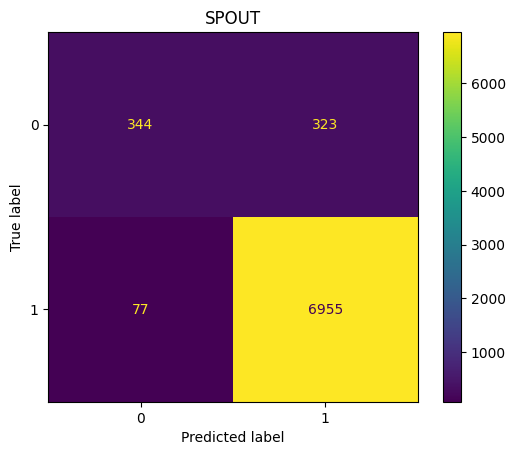

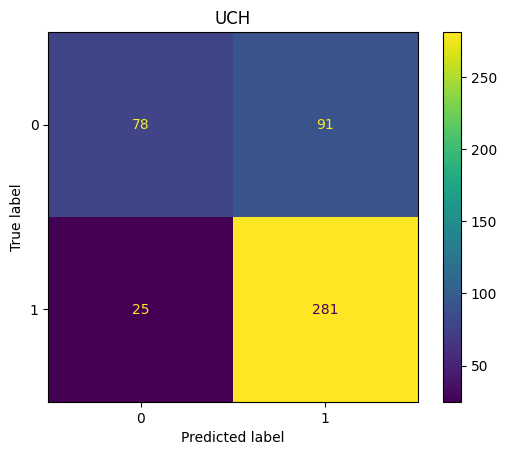

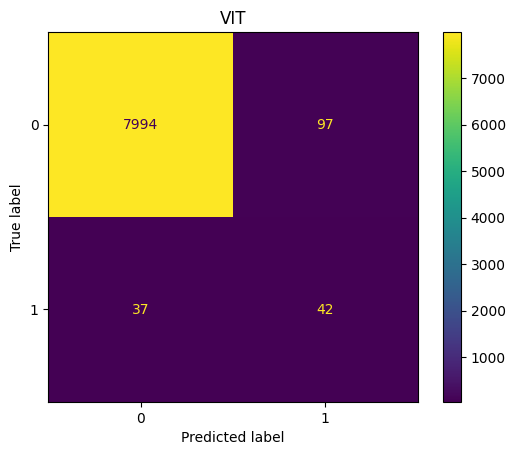

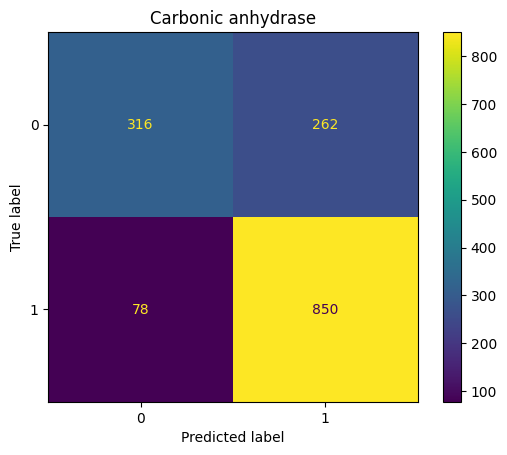

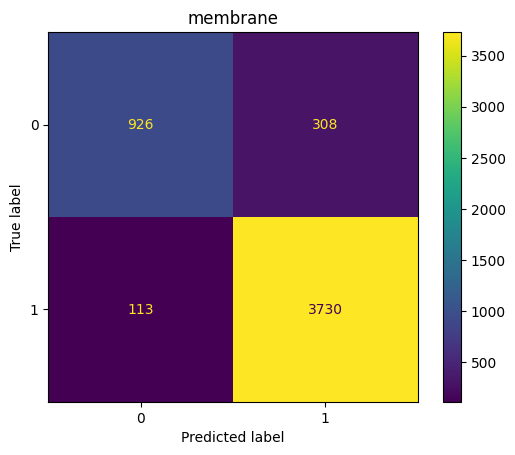

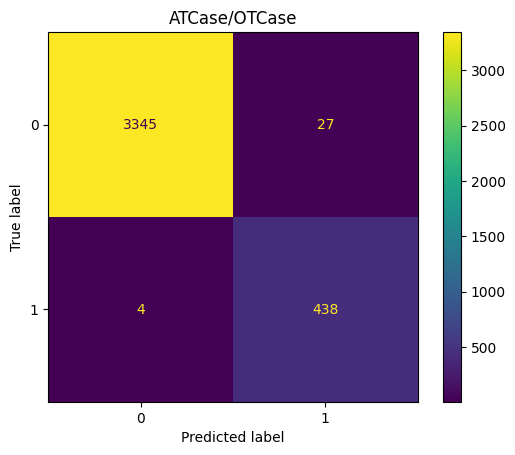

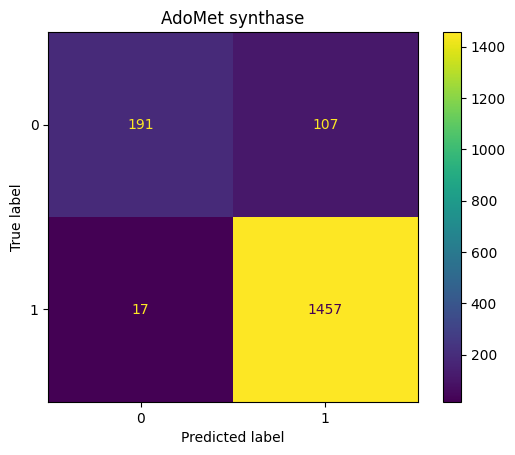

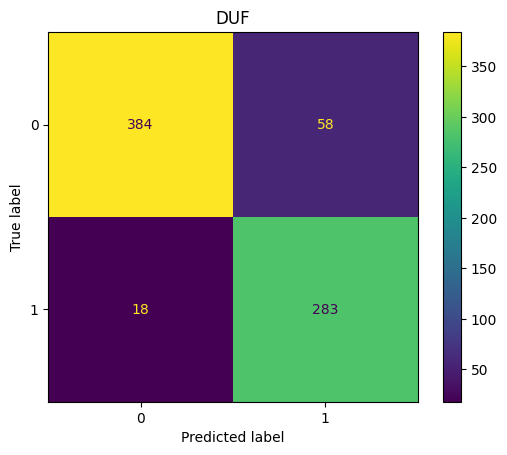

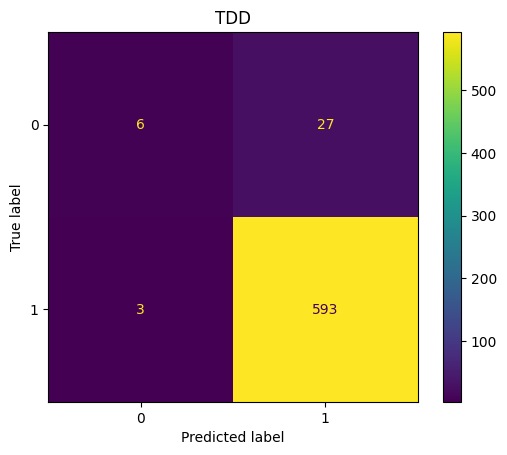

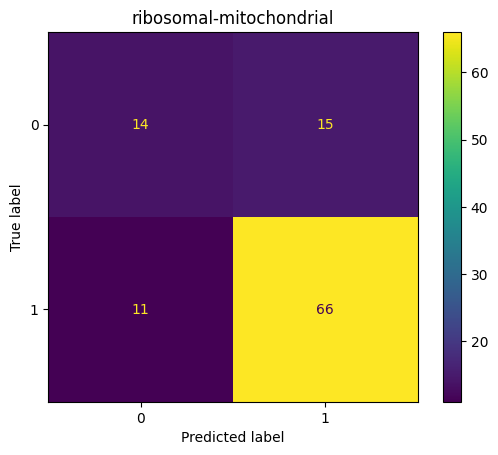

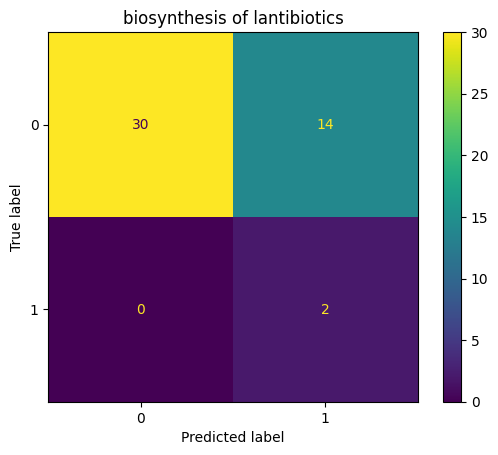

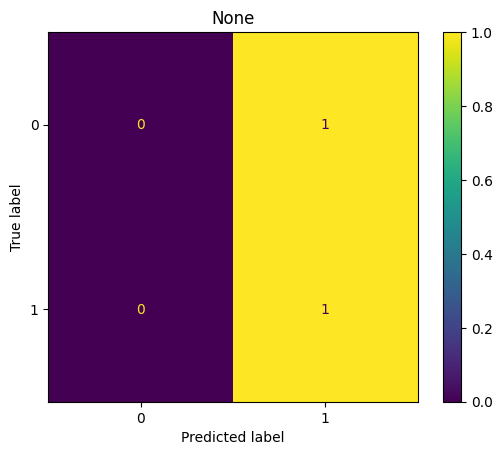

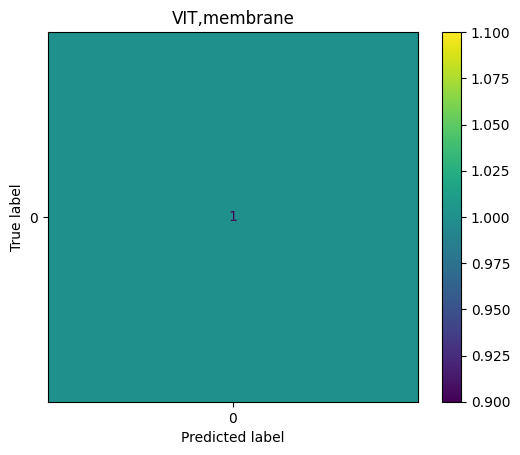

In [15]:
for family_name in families:
    df_tmp = dataset_test.loc[dataset_test['FamilyName'] == family_name]
    get_all_metrics(df_tmp, family_name)
    del(df_tmp)

Check uncertainty of families (it would be nice if all the families had only peaks close to 0.0 and 1.0, not around 0.5):

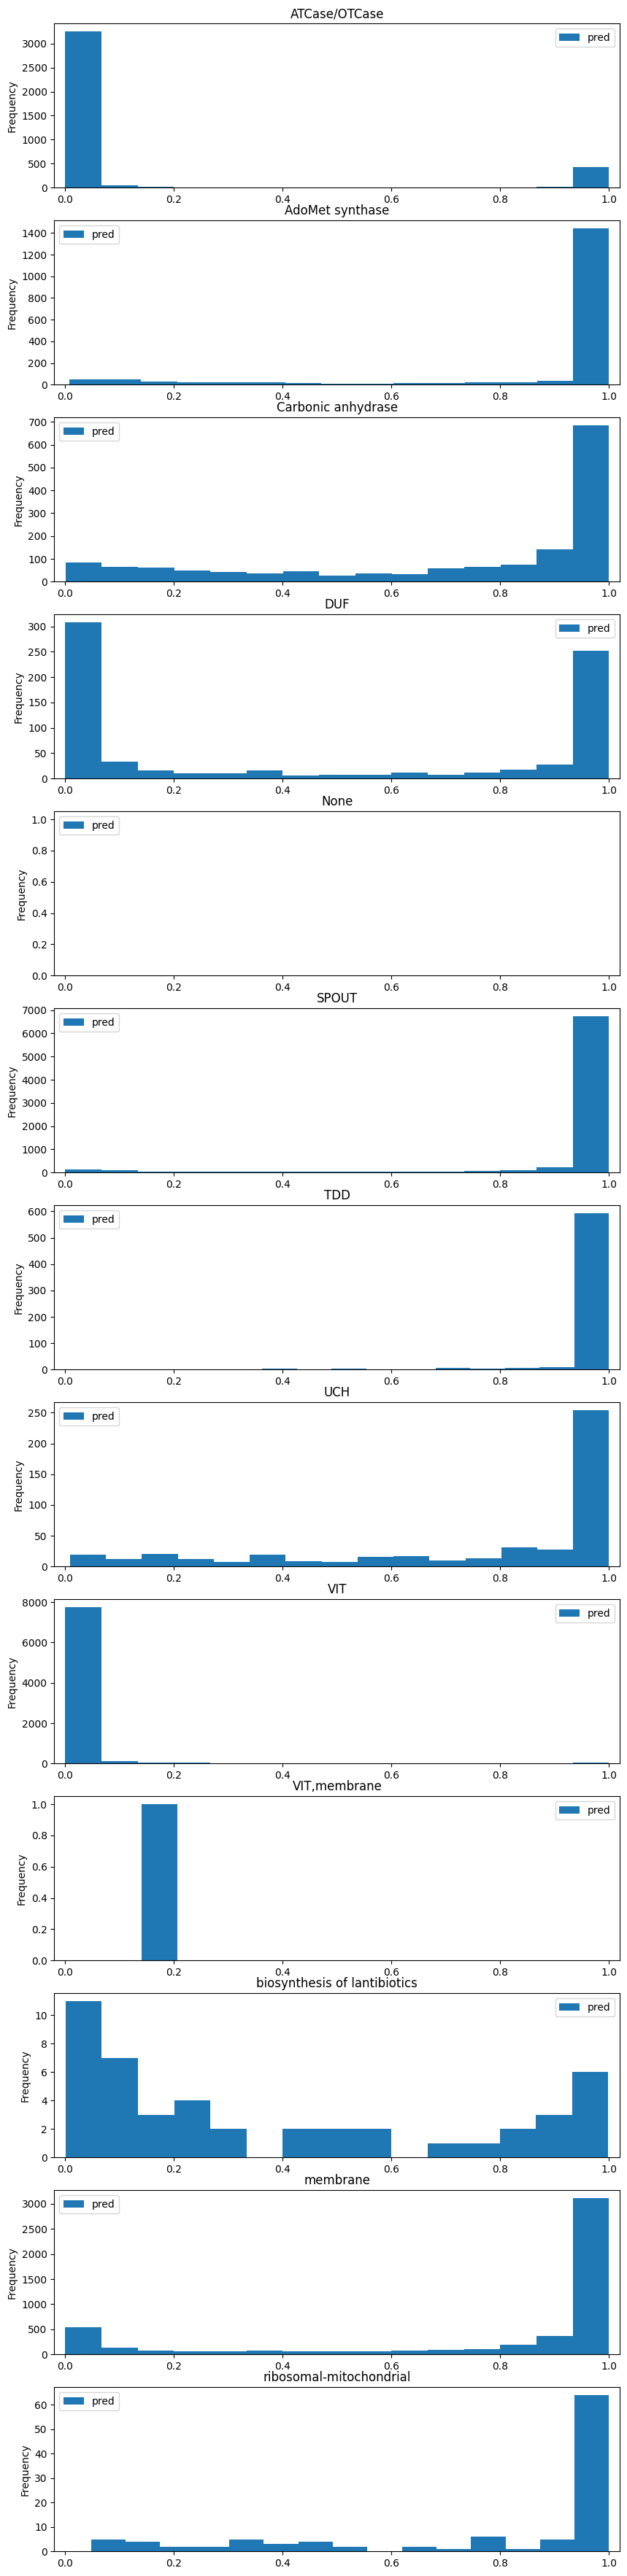

In [16]:
ax = dataset_test.plot.hist(column=['pred'], by='FamilyName', bins=15, figsize=(10, 45), xlim=(-0.02,1.02))